- **First iteration: Daily Activity/Number of Hours Awake ~ Sleep Duration/Standarized Bedtime(Offset)**

#### We are studying to see whether bedtime, hours of sleep, or both have strongest effect on one's activity levels during the day. 

**Relationships to test**: Activity ~ Bedtime + Hours of Sleep | Activity ~ Bedtime * Hours of Sleep | Minutes of napping ~ Bedtime + Hours of Sleep | Minutes slept earlier than average ~ Bedtime + Hrs of Sleep

**Hypothesis**: Hours of sleep will have the most impact on level of activity and bedtime will have a slight impact on level of activity

In [1]:
from SALA import processing
from SALA import plots
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import seaborn as sns

In [2]:
timezone = "America/Los_Angeles"
latitude = 47.61
longitude = 122.33

In [3]:
summer16_raw = pd.read_parquet('data/summer16_raw.parquet')
summer16_raw

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group
DateTime,,,,,,,,,,,
2016-07-12 16:11:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:15,0,0.0,0.0,0.0,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:30,0,0.0,0.0,0.0,1.59,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:45,0,0.0,0.0,0.0,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:12:00,0,0.0,0.0,0.0,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-12 17:18:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,summer_160024,summer_16
2016-07-12 17:18:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,summer_160024,summer_16
2016-07-12 17:18:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,summer_160024,summer_16


In [4]:
summer16_raw

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group
DateTime,,,,,,,,,,,
2016-07-12 16:11:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:15,0,0.0,0.0,0.0,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:30,0,0.0,0.0,0.0,1.59,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:45,0,0.0,0.0,0.0,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:12:00,0,0.0,0.0,0.0,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-12 17:18:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,summer_160024,summer_16
2016-07-12 17:18:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,summer_160024,summer_16
2016-07-12 17:18:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,summer_160024,summer_16


In [5]:
sala_summer16 = pd.read_parquet('data/summer_2016timing.parquet')
sala_summer16

,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,Watch period,DayofWeek,GroupDayofWeek,GroupDayType,Weekend/Holiday,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM
index,,,,,,,,,,,,,,,,,,,,,
0,summer_160048,2016-07-12,5,NaT,NaN,NaT,NaN,0 days 00:00:00,0 days 00:00:00,0.00,...,0 days 00:00:15,1,summer_16Tues,summer_16Weekday,False,2016-07-12 00:00:00,2016-07-12 00:00:00,0 days 00:00:00,0.00,0.00
1,summer_160048,2016-07-20,5,2016-07-21 01:39:00,1299.0,2016-07-20 09:16:45,316.0,0 days 06:34:45,0 days 01:02:30,394.75,...,0 days 00:00:15,2,summer_16Wed,summer_16Weekday,False,2016-07-21 02:08:30,2016-07-21 08:15:30,0 days 06:07:00,1568.50,495.50
2,summer_160048,2016-07-22,5,2016-07-23 01:56:45,1316.0,2016-07-22 06:22:15,142.0,0 days 02:59:15,0 days 00:59:30,179.25,...,0 days 00:00:15,4,summer_16Fri,summer_16Weekday,False,2016-07-23 02:20:00,2016-07-23 09:39:15,0 days 07:19:15,1580.00,579.25
3,summer_160048,2016-07-27,5,2016-07-27 11:02:15,422.0,2016-07-27 09:09:15,309.0,0 days 00:42:30,0 days 00:42:30,42.50,...,0 days 00:00:15,2,summer_16Wed,summer_16Weekday,False,2016-07-27 00:00:00,2016-07-27 00:00:00,0 days 00:00:00,0.00,0.00
4,summer_160048,2016-07-25,5,2016-07-26 00:38:00,1238.0,2016-07-25 08:44:45,284.0,0 days 07:04:15,0 days 01:23:45,424.25,...,0 days 00:00:15,0,summer_16Mon,summer_16Weekday,False,2016-07-26 00:53:45,2016-07-26 11:36:45,0 days 10:43:00,1493.75,696.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,summer_160024,2016-07-05,500,2016-07-05 22:25:00,1105.0,2016-07-05 07:51:30,231.0,0 days 01:50:15,0 days 00:26:15,110.25,...,0 days 00:00:15,1,summer_16Tues,summer_16Weekday,False,2016-07-06 01:41:30,2016-07-06 06:18:30,0 days 04:37:00,1541.50,378.50
1090,summer_160024,2016-07-08,500,2016-07-09 03:36:15,1416.0,2016-07-08 10:21:15,381.0,0 days 00:59:30,0 days 00:26:45,59.50,...,0 days 00:00:15,4,summer_16Fri,summer_16Weekday,False,2016-07-09 03:47:00,2016-07-09 07:48:45,0 days 04:01:45,1667.00,468.75
1091,summer_160024,2016-07-02,500,2016-07-03 00:23:30,1223.0,2016-07-02 09:51:30,351.0,0 days 01:41:45,0 days 00:48:45,101.75,...,0 days 00:00:15,5,summer_16Sat,summer_16Weekend/Holiday,True,2016-07-03 02:54:30,2016-07-03 13:36:30,0 days 10:42:00,1614.50,816.50


**Step 1:** Create a SALA object and make sure process_sleep is run on it (We call this sleep_df). We will use this information to identify daily bedtime and duration of sleep.

In [6]:
sala_winter_data = pd.read_parquet('data/winter_2018timing.parquet')
sala_winter_parquet = processing.SALAFrame(latitude, longitude, timezone, data = sala_winter_data)
print(sala_winter_data.shape)
sala_winter_data.head()

(4173, 26)


,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,GroupDayofWeek,GroupDayType,Weekend/Holiday,Sunrise,Sunset,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM
index,,,,,,,,,,,,,,,,,,,,,
0,winter0112,2018-02-21,5,2018-02-22 01:51:15,1311.0,2018-02-21 11:10:00,430.0,0 days 02:19:00,0 days 00:26:00,139.00,...,winterWed,winterWeekday,False,2018-02-21 07:02:26.797121+00:00,2018-02-21 17:25:35.733208+00:00,2018-02-22 02:25:15,2018-02-22 10:29:30,0 days 08:04:15,1585.25,629.50
1,winter0112,2018-02-18,5,2018-02-19 03:03:15,1383.0,2018-02-18 08:25:15,265.0,0 days 02:27:45,0 days 00:05:00,147.75,...,winterSun,winterWeekend/Holiday,True,2018-02-18 07:08:27.957127+00:00,2018-02-18 17:20:10.462755+00:00,2018-02-19 04:46:00,2018-02-19 14:08:15,0 days 09:22:15,1726.00,848.25
2,winter0112,2018-02-08,5,2018-02-09 00:35:45,1235.0,2018-02-08 13:14:15,554.0,0 days 01:51:00,0 days 00:00:00,111.00,...,winterThu,winterWeekday,False,2018-02-08 07:27:09.085726+00:00,2018-02-08 17:01:55.037768+00:00,2018-02-09 03:55:45,2018-02-09 09:59:45,0 days 06:04:00,1675.75,599.75
3,winter0112,2018-02-17,5,2018-02-18 03:59:00,1439.0,2018-02-17 12:47:00,527.0,0 days 04:14:15,0 days 00:00:00,254.25,...,winterSat,winterWeekend/Holiday,True,2018-02-17 07:10:26.066947+00:00,2018-02-17 17:18:21.583381+00:00,2018-02-18 09:35:00,2018-02-18 14:11:00,0 days 04:36:00,2015.00,851.00
4,winter0112,2018-02-22,5,2018-02-22 12:41:45,521.0,2018-02-22 10:56:00,416.0,0 days 00:22:15,0 days 00:10:45,22.25,...,winterThu,winterWeekday,False,2018-02-22 07:00:24.275421+00:00,2018-02-22 17:27:23.660636+00:00,2018-02-22 00:00:00,2018-02-22 00:00:00,0 days 00:00:00,0.00,0.00


In [7]:
sala_summer_data = pd.read_parquet('data/summer_2016timing.parquet')
sala_summer_parquet = processing.SALAFrame(latitude, longitude, timezone, data = sala_summer_data)
print(sala_summer_data.shape)
sala_summer_data.head()

(3282, 24)


,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,Watch period,DayofWeek,GroupDayofWeek,GroupDayType,Weekend/Holiday,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM
index,,,,,,,,,,,,,,,,,,,,,
0,summer_160048,2016-07-12,5,NaT,NaN,NaT,NaN,0 days 00:00:00,0 days 00:00:00,0.00,...,0 days 00:00:15,1,summer_16Tues,summer_16Weekday,False,2016-07-12 00:00:00,2016-07-12 00:00:00,0 days 00:00:00,0.00,0.00
1,summer_160048,2016-07-20,5,2016-07-21 01:39:00,1299.0,2016-07-20 09:16:45,316.0,0 days 06:34:45,0 days 01:02:30,394.75,...,0 days 00:00:15,2,summer_16Wed,summer_16Weekday,False,2016-07-21 02:08:30,2016-07-21 08:15:30,0 days 06:07:00,1568.50,495.50
2,summer_160048,2016-07-22,5,2016-07-23 01:56:45,1316.0,2016-07-22 06:22:15,142.0,0 days 02:59:15,0 days 00:59:30,179.25,...,0 days 00:00:15,4,summer_16Fri,summer_16Weekday,False,2016-07-23 02:20:00,2016-07-23 09:39:15,0 days 07:19:15,1580.00,579.25
3,summer_160048,2016-07-27,5,2016-07-27 11:02:15,422.0,2016-07-27 09:09:15,309.0,0 days 00:42:30,0 days 00:42:30,42.50,...,0 days 00:00:15,2,summer_16Wed,summer_16Weekday,False,2016-07-27 00:00:00,2016-07-27 00:00:00,0 days 00:00:00,0.00,0.00
4,summer_160048,2016-07-25,5,2016-07-26 00:38:00,1238.0,2016-07-25 08:44:45,284.0,0 days 07:04:15,0 days 01:23:45,424.25,...,0 days 00:00:15,0,summer_16Mon,summer_16Weekday,False,2016-07-26 00:53:45,2016-07-26 11:36:45,0 days 10:43:00,1493.75,696.75


sleep_df should have process_data run on it and must have these columns: 'UID', 'Date', 'GroupDayType', 'Sleep onset', 'Sleep offset', 'Sleep duration', 'Sleep onset MSLM', 'Sleep offset MSLM'

**Step 2:** Get the raw data. Optionally sort it by DateTime

XXXX Notice how the following two raw dataframes have different values in UID and Group. (Figure out why)

In [8]:
winter_raw = pd.read_parquet('data/winter18_raw.parquet')
winter_raw

,DateTime,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group
0,2018-02-08 00:52:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0112,winter
1,2018-02-08 00:52:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0112,winter
2,2018-02-08 00:52:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0112,winter
3,2018-02-08 00:52:45,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0112,winter
4,2018-02-08 00:53:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0112,winter
...,...,...,...,...,...,...,...,...,...,...,...,...
7618090,2018-02-07 15:34:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0041,winter
7618091,2018-02-07 15:34:45,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0041,winter
7618092,2018-02-07 15:35:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0041,winter
7618093,2018-02-07 15:35:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0041,winter


In [9]:
summer_raw = pd.read_parquet('data/summer16_raw.parquet')
summer_raw

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group
DateTime,,,,,,,,,,,
2016-07-12 16:11:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:15,0,0.0,0.0,0.0,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:30,0,0.0,0.0,0.0,1.59,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:45,0,0.0,0.0,0.0,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:12:00,0,0.0,0.0,0.0,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-12 17:18:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,summer_160024,summer_16
2016-07-12 17:18:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,summer_160024,summer_16
2016-07-12 17:18:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,summer_160024,summer_16


In [10]:
summer_raw.groupby('Group').sum()

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake
Group,,,,,,,,
summer_16,435872,234066456.0,1479.0,8.750061e+08,1.060129e+09,7.518990e+08,4.356324e+08,2954959.0


In [11]:
summer_raw[(summer_raw['Interval Status']=='REST')&(summer_raw['Activity']>0)].groupby('Group').sum()

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake
Group,,,,,,,,
summer_16,0,4086805.0,477.0,3163354.44,2692071.673,2.004754e+06,1.349137e+06,70844.0


In [12]:
summer_raw[(summer_raw['Interval Status']=='REST-S')&(summer_raw['Activity']>0)].groupby('Group').sum()

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake
Group,,,,,,,,
summer_16,0,5022345.0,170.0,282193.94,461353.834,295565.1887,195450.1663,79767.0


In [13]:
#calculate total activity from wakeup to sleep and divides it by the amount of time the person was awake aka sleep-wakeup
def calculateActivity(wakeup, sleep, raw):
    if len(raw[(raw['DateTime']>wakeup) & (raw['DateTime']<sleep)].groupby('Group').sum().get('Activity')) == 0:
        return 0
    total_activity = raw[(raw['DateTime']>wakeup) & (raw['DateTime']<sleep)].groupby('Group').sum().get('Activity').iloc[0]
    total_hrs_awake = (sleep-wakeup)/datetime.timedelta(hours=1) #number of hours awake
    return total_activity/total_hrs_awake

In [14]:
def addActivityInfo(sleep_df, raw):
    length = sleep_df.shape[0]
    for i in range(length-1):
        sleep_df.iloc[i,sleep_df.columns.get_loc('Activity')] = calculateActivity(sleep_df['Sleep offset'].iloc[i], sleep_df['Sleep onset'].iloc[i+1], raw)
    return sleep_df
#winter0112.Date.array.strftime("%d").astype(int) might be useful for checking if person goes to sleep next day

**One caveat** here that could cause errors in the future depending on the raw dataframe. Make sure that raw has a column of data that matches with the data in sleep_df['UID']

**completeActivityDataframe** -> Keep only the useful columns, drop duplicate rows, and intialize an Activity column. sleep_df must be sorted by Date

In [15]:
def completeActivityDataframe(sleep_df, raw):
    useful_columns = ['UID', 'Date', 'GroupDayType', 'Sleep onset', 'Sleep offset', 'Sleep duration', 'Sleep onset MSLM', 'Sleep offset MSLM']
    sleep_df = sleep_df[useful_columns].drop_duplicates() #clean sleep_df
    zero_array = sleep_df.shape[0]*[0]
    sleep_df['Activity'] = zero_array
    raw = raw.reset_index().sort_values(by='DateTime')
    output = pd.DataFrame()
    for uid in sleep_df.UID.unique():
        unique_df = sleep_df[sleep_df['UID'] == uid].sort_values('Date')
        unique_raw = raw[raw['UID'] == uid]
        output = output.append(addActivityInfo(unique_df, unique_raw))
    return output


**Step 3:** Run **completeActivityDataframe** which fills in the Activity column of the sleep_df using activity information provided in the raw data dataframe. 
- Additionally convert timedelta column, Sleep duration, into floats

In [16]:
winter18_activity = completeActivityDataframe(sala_winter_data,winter_raw)
winter18_activity

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity
index,,,,,,,,,
2,winter0112,2018-02-08,winterWeekday,2018-02-09 03:55:45,2018-02-09 09:59:45,0 days 06:04:00,1675.75,599.75,15853.161472
8,winter0112,2018-02-09,winterWeekday,2018-02-10 03:46:30,2018-02-10 12:44:30,0 days 08:58:00,1666.50,764.50,18256.432910
7,winter0112,2018-02-10,winterWeekend/Holiday,2018-02-11 03:50:00,2018-02-11 13:21:30,0 days 09:31:30,1670.00,801.50,20681.729598
10,winter0112,2018-02-11,winterWeekend/Holiday,2018-02-12 03:02:30,2018-02-12 07:29:30,0 days 04:27:00,1622.50,449.50,17155.551679
11,winter0112,2018-02-12,winterWeekday,2018-02-13 02:36:00,2018-02-13 11:03:15,0 days 08:27:15,1596.00,663.25,22383.457403
...,...,...,...,...,...,...,...,...,...
1376,winter0041,2018-02-03,winterWeekend/Holiday,2018-02-04 02:13:15,2018-02-04 07:22:45,0 days 05:09:30,1573.25,442.75,18600.332103
1378,winter0041,2018-02-04,winterWeekend/Holiday,2018-02-05 01:26:45,2018-02-05 08:41:15,0 days 07:14:30,1526.75,521.25,14220.442752
1390,winter0041,2018-02-05,winterWeekday,2018-02-06 02:11:30,2018-02-06 11:59:30,0 days 09:48:00,1571.50,719.50,18173.756922


In [17]:
summer16_activity = completeActivityDataframe(sala_summer_data,summer_raw)
summer16_activity

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity
index,,,,,,,,,
0,summer_160048,2016-07-12,summer_16Weekday,2016-07-12 00:00:00,2016-07-12 00:00:00,0 days 00:00:00,0.00,0.00,3394.052191
14,summer_160048,2016-07-13,summer_16Weekday,2016-07-14 02:46:30,2016-07-14 08:49:15,0 days 06:02:45,1606.50,529.25,15868.927303
9,summer_160048,2016-07-14,summer_16Weekday,2016-07-15 02:25:00,2016-07-15 12:27:30,0 days 10:02:30,1585.00,747.50,18214.776589
5,summer_160048,2016-07-15,summer_16Weekday,2016-07-16 01:42:00,2016-07-16 09:03:00,0 days 07:21:00,1542.00,543.00,29356.921776
15,summer_160048,2016-07-16,summer_16Weekend/Holiday,2016-07-17 04:45:30,2016-07-17 13:34:30,0 days 08:49:00,1725.50,814.50,28099.839554
...,...,...,...,...,...,...,...,...,...
1093,summer_160024,2016-07-08,summer_16Weekday,2016-07-09 03:47:00,2016-07-09 07:48:45,0 days 04:01:45,1667.00,468.75,10724.905998
1088,summer_160024,2016-07-09,summer_16Weekend/Holiday,2016-07-10 02:25:45,2016-07-10 07:24:15,0 days 04:58:30,1585.75,444.25,18305.064935
1085,summer_160024,2016-07-10,summer_16Weekend/Holiday,2016-07-10 22:48:15,2016-07-11 07:43:00,0 days 08:54:45,1368.25,463.00,12536.773571


In [18]:
#converts column Sleep duration from a timedelta to a float
def timedeltaToFloat(timedelta):
    return timedelta/datetime.timedelta(hours=1)

In [19]:
winter18_activity['Sleep duration'] = winter18_activity['Sleep duration'].apply(timedeltaToFloat)
winter18_activity

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity
index,,,,,,,,,
2,winter0112,2018-02-08,winterWeekday,2018-02-09 03:55:45,2018-02-09 09:59:45,6.066667,1675.75,599.75,15853.161472
8,winter0112,2018-02-09,winterWeekday,2018-02-10 03:46:30,2018-02-10 12:44:30,8.966667,1666.50,764.50,18256.432910
7,winter0112,2018-02-10,winterWeekend/Holiday,2018-02-11 03:50:00,2018-02-11 13:21:30,9.525000,1670.00,801.50,20681.729598
10,winter0112,2018-02-11,winterWeekend/Holiday,2018-02-12 03:02:30,2018-02-12 07:29:30,4.450000,1622.50,449.50,17155.551679
11,winter0112,2018-02-12,winterWeekday,2018-02-13 02:36:00,2018-02-13 11:03:15,8.454167,1596.00,663.25,22383.457403
...,...,...,...,...,...,...,...,...,...
1376,winter0041,2018-02-03,winterWeekend/Holiday,2018-02-04 02:13:15,2018-02-04 07:22:45,5.158333,1573.25,442.75,18600.332103
1378,winter0041,2018-02-04,winterWeekend/Holiday,2018-02-05 01:26:45,2018-02-05 08:41:15,7.241667,1526.75,521.25,14220.442752
1390,winter0041,2018-02-05,winterWeekday,2018-02-06 02:11:30,2018-02-06 11:59:30,9.800000,1571.50,719.50,18173.756922


In [20]:
summer16_activity['Sleep duration'] = summer16_activity['Sleep duration'].apply(timedeltaToFloat)
summer16_activity

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity
index,,,,,,,,,
0,summer_160048,2016-07-12,summer_16Weekday,2016-07-12 00:00:00,2016-07-12 00:00:00,0.000000,0.00,0.00,3394.052191
14,summer_160048,2016-07-13,summer_16Weekday,2016-07-14 02:46:30,2016-07-14 08:49:15,6.045833,1606.50,529.25,15868.927303
9,summer_160048,2016-07-14,summer_16Weekday,2016-07-15 02:25:00,2016-07-15 12:27:30,10.041667,1585.00,747.50,18214.776589
5,summer_160048,2016-07-15,summer_16Weekday,2016-07-16 01:42:00,2016-07-16 09:03:00,7.350000,1542.00,543.00,29356.921776
15,summer_160048,2016-07-16,summer_16Weekend/Holiday,2016-07-17 04:45:30,2016-07-17 13:34:30,8.816667,1725.50,814.50,28099.839554
...,...,...,...,...,...,...,...,...,...
1093,summer_160024,2016-07-08,summer_16Weekday,2016-07-09 03:47:00,2016-07-09 07:48:45,4.029167,1667.00,468.75,10724.905998
1088,summer_160024,2016-07-09,summer_16Weekend/Holiday,2016-07-10 02:25:45,2016-07-10 07:24:15,4.975000,1585.75,444.25,18305.064935
1085,summer_160024,2016-07-10,summer_16Weekend/Holiday,2016-07-10 22:48:15,2016-07-11 07:43:00,8.912500,1368.25,463.00,12536.773571


**Step 4:** Remove rows that contain a zero value for Activity or Sleep duration or a substituted value for Sleep onset or Sleep offset (i.e. when its hours, minutes, and seconds are all exactly zero). These rows have bad/non-official data.

In [21]:
winter18_activity = winter18_activity[(winter18_activity['Activity']!=0) & (winter18_activity['Sleep duration']!=0)]
winter18_activity

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity
index,,,,,,,,,
2,winter0112,2018-02-08,winterWeekday,2018-02-09 03:55:45,2018-02-09 09:59:45,6.066667,1675.75,599.75,15853.161472
8,winter0112,2018-02-09,winterWeekday,2018-02-10 03:46:30,2018-02-10 12:44:30,8.966667,1666.50,764.50,18256.432910
7,winter0112,2018-02-10,winterWeekend/Holiday,2018-02-11 03:50:00,2018-02-11 13:21:30,9.525000,1670.00,801.50,20681.729598
10,winter0112,2018-02-11,winterWeekend/Holiday,2018-02-12 03:02:30,2018-02-12 07:29:30,4.450000,1622.50,449.50,17155.551679
11,winter0112,2018-02-12,winterWeekday,2018-02-13 02:36:00,2018-02-13 11:03:15,8.454167,1596.00,663.25,22383.457403
...,...,...,...,...,...,...,...,...,...
1381,winter0041,2018-02-01,winterWeekday,2018-02-02 03:40:15,2018-02-02 07:04:45,3.408333,1660.25,424.75,15939.415730
1388,winter0041,2018-02-02,winterWeekday,2018-02-02 23:46:00,2018-02-03 13:40:45,13.912500,1426.00,820.75,26432.053156
1376,winter0041,2018-02-03,winterWeekend/Holiday,2018-02-04 02:13:15,2018-02-04 07:22:45,5.158333,1573.25,442.75,18600.332103


In [22]:
summer16_activity = summer16_activity[(summer16_activity['Activity']!=0) & (summer16_activity['Sleep duration']!=0)]
summer16_activity

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity
index,,,,,,,,,
14,summer_160048,2016-07-13,summer_16Weekday,2016-07-14 02:46:30,2016-07-14 08:49:15,6.045833,1606.50,529.25,15868.927303
9,summer_160048,2016-07-14,summer_16Weekday,2016-07-15 02:25:00,2016-07-15 12:27:30,10.041667,1585.00,747.50,18214.776589
5,summer_160048,2016-07-15,summer_16Weekday,2016-07-16 01:42:00,2016-07-16 09:03:00,7.350000,1542.00,543.00,29356.921776
15,summer_160048,2016-07-16,summer_16Weekend/Holiday,2016-07-17 04:45:30,2016-07-17 13:34:30,8.816667,1725.50,814.50,28099.839554
11,summer_160048,2016-07-17,summer_16Weekend/Holiday,2016-07-18 01:31:15,2016-07-18 12:23:00,10.862500,1531.25,743.00,28247.682620
...,...,...,...,...,...,...,...,...,...
1090,summer_160024,2016-07-06,summer_16Weekday,2016-07-07 00:25:30,2016-07-07 06:01:45,5.604167,1465.50,361.75,18853.538334
1082,summer_160024,2016-07-07,summer_16Weekday,2016-07-08 02:05:00,2016-07-08 10:14:00,8.150000,1565.00,614.00,23623.304843
1093,summer_160024,2016-07-08,summer_16Weekday,2016-07-09 03:47:00,2016-07-09 07:48:45,4.029167,1667.00,468.75,10724.905998


- check if sleep onset is within one day of date
- This section removes all the rows that have dead values for either sleep_onset or sleep_offset. For this dataset however all these rows were already removed when I filtered out zero values for activity and sleep duration.
- **dropRowsWithSleepNaN** takes in the activity_df and drops the rows that have NaN for sleep onset or sleep offset. The function must have Sleep onset and Sleep offset.

In [23]:
#column can either be sleep offset or sleep onset
def hasZeroDatetime(column):
    if int(column.strftime('%H')) == 0 and int(column.strftime('%M')) == 0 and int(column.strftime('%S')) == 0:
        return True
    return False

In [24]:
winter18_activity['should_drop_offset'] = winter18_activity['Sleep offset'].apply(hasZeroDatetime)
winter18_activity['should_drop_onset'] = winter18_activity['Sleep onset'].apply(hasZeroDatetime)

/var/folders/21/3pfj48b93_dfj5qvpfdk7v0h0000gn/T/ipykernel_37030/3502264389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter18_activity['should_drop_offset'] = winter18_activity['Sleep offset'].apply(hasZeroDatetime)
/var/folders/21/3pfj48b93_dfj5qvpfdk7v0h0000gn/T/ipykernel_37030/3502264389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter18_activity['should_drop_onset'] = winter18_activity['Sleep onset'].apply(hasZeroDatetime)


In [25]:
summer16_activity['should_drop_offset'] = summer16_activity['Sleep offset'].apply(hasZeroDatetime)
summer16_activity['should_drop_onset'] = summer16_activity['Sleep onset'].apply(hasZeroDatetime)

/var/folders/21/3pfj48b93_dfj5qvpfdk7v0h0000gn/T/ipykernel_37030/863850078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer16_activity['should_drop_offset'] = summer16_activity['Sleep offset'].apply(hasZeroDatetime)
/var/folders/21/3pfj48b93_dfj5qvpfdk7v0h0000gn/T/ipykernel_37030/863850078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer16_activity['should_drop_onset'] = summer16_activity['Sleep onset'].apply(hasZeroDatetime)


In [26]:
winter18_activity[(winter18_activity['should_drop_offset']==True)|(winter18_activity['should_drop_onset']==True)]

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,should_drop_offset,should_drop_onset
index,,,,,,,,,,,


In [27]:
summer16_activity[(summer16_activity['should_drop_offset']==True)|(summer16_activity['should_drop_onset']==True)]

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,should_drop_offset,should_drop_onset
index,,,,,,,,,,,


In [28]:
winter18_activity = winter18_activity[(winter18_activity['should_drop_offset']==False)&(winter18_activity['should_drop_onset']==False)]

In [29]:
summer16_activity = summer16_activity[(summer16_activity['should_drop_offset']==False)&(summer16_activity['should_drop_onset']==False)]

In [30]:
winter18_activity.drop(columns = ['should_drop_offset', 'should_drop_onset'], inplace = True)

In [31]:
summer16_activity.drop(columns = ['should_drop_offset', 'should_drop_onset'], inplace = True)

In [32]:
print(winter18_activity.shape[0])
winter18_activity.groupby(['UID', 'Date']).size()

1126


UID         Date      
winter0001  2018-01-09    1
            2018-01-10    1
            2018-01-11    1
            2018-01-12    1
            2018-01-13    1
                         ..
winter0121  2018-02-09    1
            2018-02-10    1
            2018-02-11    1
            2018-02-12    1
            2018-02-13    1
Length: 1126, dtype: int64

In [33]:
print(summer16_activity.shape[0])
summer16_activity.groupby(['UID', 'Date']).size()

844


UID            Date      
summer_160001  2016-06-27    1
               2016-06-28    1
               2016-06-29    1
               2016-06-30    1
               2016-07-01    1
                            ..
summer_160082  2016-07-21    1
               2016-07-22    1
               2016-07-23    1
               2016-07-24    1
               2016-07-25    1
Length: 844, dtype: int64

- Winter: Both of the above are 1126 which means that not even one person sleeps more than once in a single day
- Summer: Both of the above are 844 which means that not even one person sleeps more than once in a single day

In [34]:
winter18_activity

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity
index,,,,,,,,,
2,winter0112,2018-02-08,winterWeekday,2018-02-09 03:55:45,2018-02-09 09:59:45,6.066667,1675.75,599.75,15853.161472
8,winter0112,2018-02-09,winterWeekday,2018-02-10 03:46:30,2018-02-10 12:44:30,8.966667,1666.50,764.50,18256.432910
7,winter0112,2018-02-10,winterWeekend/Holiday,2018-02-11 03:50:00,2018-02-11 13:21:30,9.525000,1670.00,801.50,20681.729598
10,winter0112,2018-02-11,winterWeekend/Holiday,2018-02-12 03:02:30,2018-02-12 07:29:30,4.450000,1622.50,449.50,17155.551679
11,winter0112,2018-02-12,winterWeekday,2018-02-13 02:36:00,2018-02-13 11:03:15,8.454167,1596.00,663.25,22383.457403
...,...,...,...,...,...,...,...,...,...
1381,winter0041,2018-02-01,winterWeekday,2018-02-02 03:40:15,2018-02-02 07:04:45,3.408333,1660.25,424.75,15939.415730
1388,winter0041,2018-02-02,winterWeekday,2018-02-02 23:46:00,2018-02-03 13:40:45,13.912500,1426.00,820.75,26432.053156
1376,winter0041,2018-02-03,winterWeekend/Holiday,2018-02-04 02:13:15,2018-02-04 07:22:45,5.158333,1573.25,442.75,18600.332103


- Now we will remove/check to see if there are any values where the Date is more than one day apart than Sleep onset.
- **findUnusualGapInDays** will print the rows for iloc purposes where people sleep very late.

In [35]:
#if people sleep later than hourLimit the next morning, then their row will be printed
def findUnusualGapInDays(activity_df, hourLimit):
    length = activity_df.shape[0]
    for i in range(length):
        date_day = int(activity_df['Date'].iloc[i].strftime('%d'))
        sleep_onset_day = int(activity_df['Sleep onset'].iloc[i].strftime('%d'))
        sleep_onset_hour = int(activity_df['Sleep onset'].iloc[i].strftime('%H'))
        if sleep_onset_day>date_day and sleep_onset_hour>hourLimit:
            print("For row " + str(i) + ' of activity_df. Sleep onset aka bedtime is after ' + str(hourLimit) + 'am of the next morning.')
        if sleep_onset_day>date_day+1:
            print("For row " + str(i) + ' of activity_df. Sleep onset is more than a day after date.')

- **Only one person slept at 10am or later the next day during the winter**

In [36]:
findUnusualGapInDays(winter18_activity, 10)

For row 565 of activity_df. Sleep onset aka bedtime is after 10am of the next morning.


- **Four people slept at 10am or later the next day during the summer.** This makes sense because during the summer, people are more likely
to have these outlandish bedtimes at 10am.

In [37]:
findUnusualGapInDays(summer16_activity, 10)

For row 150 of activity_df. Sleep onset aka bedtime is after 10am of the next morning.
For row 205 of activity_df. Sleep onset aka bedtime is after 10am of the next morning.
For row 372 of activity_df. Sleep onset aka bedtime is after 10am of the next morning.
For row 517 of activity_df. Sleep onset aka bedtime is after 10am of the next morning.


- **Seventeen people slept at 5am or later the next day during the winter**
- Might consider these as outliers

In [38]:
findUnusualGapInDays(winter18_activity, 5)

For row 9 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 313 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 317 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 452 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 561 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 562 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 563 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 565 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 567 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 644 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 651 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 656 of activity_df. Sleep onset aka bedtime is a

- **Twenty one people slept at 5am or later the next day during the summer**

In [39]:
findUnusualGapInDays(summer16_activity, 5)

For row 130 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 150 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 164 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 191 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 205 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 269 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 294 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 345 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 372 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 443 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 452 of activity_df. Sleep onset aka bedtime is after 5am of the next morning.
For row 511 of activity_df. Sleep onset aka bedtime is

There are no cases where the day in Date is more than one day off than the day in Sleep onset, which is good

Next step is to convert Sleep onset column into a Bedtime column that is better for calculations. What is mean bedtime? or 25th percentile? 10pm maybe?

- an interesting question is do people normally sleep on first half of the hour or second half

In [40]:
winter18_activity['bedtime'] = winter18_activity['Sleep onset'].dt.strftime("%H").astype(int) + winter18_activity['Sleep onset'].dt.strftime("%M").astype(int)/60
winter18_activity['hour'] = winter18_activity['Sleep onset'].dt.strftime("%H").astype(int)

In [41]:
summer16_activity['bedtime'] = summer16_activity['Sleep onset'].dt.strftime("%H").astype(int) + summer16_activity['Sleep onset'].dt.strftime("%M").astype(int)/60
summer16_activity['hour'] = summer16_activity['Sleep onset'].dt.strftime("%H").astype(int)

On 33 days, people slept between 6pm and 10pm

In [42]:
winter18_activity[(winter18_activity['hour']>18) & (winter18_activity['hour']<22)].shape[0]

33

On 115 days, people slept between 10pm and 12am

In [43]:
winter18_activity[(winter18_activity['hour']>22) & (winter18_activity['hour']<24)].shape[0]

115

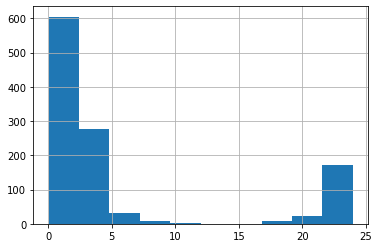

In [44]:
hist = winter18_activity['bedtime'].hist(bins=10)

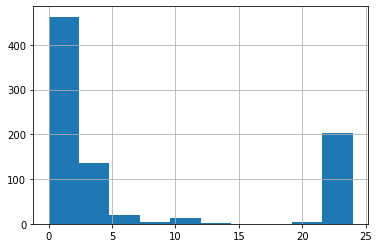

In [45]:
hist = summer16_activity['bedtime'].hist(bins=10)

Find earliest bedtime.

In [46]:
print(winter18_activity[winter18_activity['bedtime']>15].sort_values(by='bedtime')['Sleep onset'].iloc[0])
winter18_activity[winter18_activity['bedtime']>15].sort_values(by='bedtime').head(10)

2018-01-08 18:00:00


,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,hour
index,,,,,,,,,,,
675,winter0022,2018-01-08,winterWeekday,2018-01-08 18:00:00,2018-01-09 09:25:30,15.425000,1080.00,565.50,10081.007610,18.000000,18
691,winter0017,2018-01-08,winterWeekday,2018-01-08 18:00:00,2018-01-09 09:25:30,15.425000,1080.00,565.50,6574.042296,18.000000,18
842,winter0012,2018-01-08,winterWeekday,2018-01-08 18:00:00,2018-01-09 09:23:00,15.383333,1080.00,563.00,9599.435484,18.000000,18
706,winter0115,2018-02-19,winterWeekend/Holiday,2018-02-19 18:00:00,2018-02-19 22:27:15,4.454167,1080.00,0.00,12916.251075,18.000000,18
611,winter0027,2018-01-08,winterWeekday,2018-01-08 18:00:00,2018-01-09 12:54:45,18.912500,1080.00,774.75,16516.597307,18.000000,18
627,winter0032,2018-01-08,winterWeekday,2018-01-08 18:00:00,2018-01-09 12:55:00,18.916667,1080.00,775.00,15020.686353,18.000000,18
341,winter0023,2018-01-08,winterWeekday,2018-01-08 18:00:00,2018-01-09 09:31:30,15.525000,1080.00,571.50,15061.949458,18.000000,18
636,winter0013,2018-01-17,winterWeekday,2018-01-17 19:17:30,2018-01-18 07:35:45,12.304167,1157.50,455.75,16169.281018,19.283333,19
792,winter0063,2018-01-23,winterWeekday,2018-01-23 19:41:15,2018-01-24 12:39:45,16.975000,1181.25,759.75,10733.567251,19.683333,19


In [47]:
weird_row_indexes = [675, 691, 842, 706, 611, 627, 341]

In [48]:
winter18_activity = winter18_activity.drop(weird_row_indexes)

In [49]:
winter18_activity[winter18_activity['bedtime']>15].sort_values(by='bedtime').head(10)

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,hour
index,,,,,,,,,,,
636,winter0013,2018-01-17,winterWeekday,2018-01-17 19:17:30,2018-01-18 07:35:45,12.304167,1157.50,455.75,16169.281018,19.283333,19
792,winter0063,2018-01-23,winterWeekday,2018-01-23 19:41:15,2018-01-24 12:39:45,16.975000,1181.25,759.75,10733.567251,19.683333,19
884,winter0059,2018-01-23,winterWeekday,2018-01-23 19:41:15,2018-01-24 08:21:30,12.670833,1181.25,501.50,11087.863248,19.683333,19
964,winter0073,2018-01-23,winterWeekday,2018-01-23 19:42:00,2018-01-24 08:21:30,12.658333,1182.00,501.50,7280.395010,19.700000,19
480,winter0046,2018-01-23,winterWeekday,2018-01-23 19:42:00,2018-01-24 15:04:15,19.370833,1182.00,904.25,13121.027458,19.700000,19
1058,winter0049,2018-01-23,winterWeekday,2018-01-23 19:43:30,2018-01-24 09:07:45,13.404167,1183.50,547.75,9365.736585,19.716667,19
313,winter0093,2018-02-17,winterWeekend/Holiday,2018-02-17 19:47:30,2018-02-18 00:32:00,4.741667,1187.50,32.00,11329.931973,19.783333,19
496,winter0043,2018-01-23,winterWeekday,2018-01-23 19:50:30,2018-01-24 09:09:00,13.308333,1190.50,549.00,10834.223263,19.833333,19
1105,winter0061,2018-01-23,winterWeekday,2018-01-23 20:17:45,2018-01-24 09:07:45,12.833333,1217.75,547.75,17022.852689,20.283333,20


Earliest bedtime is 6pm. **These first seven values are probably incorrectly captured data because it's highly unlikely that seven different people slept at exactly 6pm.**
- So probably the true earliest bedtime is 7:17pm, so let's delete these weird rows.
Standarized bedtime = bedtime - 7:17pm. So under standarized bedtime, a bedtime at 1:17am becomes 6 because 1:17am is 6 hours after 7:17pm. Because 1:17am - 7:17pm is 6 hours.

In [50]:
earliest_bed_winter = "7:17pm"

Unlike winter's earliest bedtime at 7:17pm, summer's earliest bedtime is 8:37pm. In terms of a float value and in army time that is 20.617.

In [51]:
print(summer16_activity[summer16_activity['bedtime']>15].sort_values(by='bedtime')['Sleep onset'].iloc[0])
summer16_activity[summer16_activity['bedtime']>15].sort_values(by='bedtime').head(10)

2016-07-25 20:37:15


,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,hour
index,,,,,,,,,,,
424,summer_160053,2016-07-25,summer_16Weekday,2016-07-25 20:37:15,2016-07-26 06:50:00,10.212500,1237.25,410.00,14259.259882,20.616667,20
984,summer_160045,2016-06-30,summer_16Weekday,2016-06-30 20:38:15,2016-07-01 04:58:15,8.333333,1238.25,298.25,13519.349153,20.633333,20
808,summer_160067,2016-07-15,summer_16Weekday,2016-07-15 20:54:45,2016-07-16 07:07:30,10.212500,1254.75,427.50,15834.189849,20.900000,20
698,summer_160060,2016-07-15,summer_16Weekday,2016-07-15 20:59:00,2016-07-16 04:28:15,7.487500,1259.00,268.25,19346.830189,20.983333,20
46,summer_160030,2016-06-29,summer_16Weekday,2016-06-29 21:24:15,2016-06-30 06:13:30,8.820833,1284.25,373.50,8213.333333,21.400000,21
230,summer_160032,2016-06-30,summer_16Weekday,2016-06-30 21:44:45,2016-07-01 05:23:00,7.637500,1304.75,323.00,20613.561554,21.733333,21
543,summer_160052,2016-07-21,summer_16Weekday,2016-07-21 21:44:45,2016-07-22 06:12:45,8.466667,1304.75,372.75,16484.327402,21.733333,21
513,summer_160049,2016-07-16,summer_16Weekend/Holiday,2016-07-16 21:46:45,2016-07-17 10:12:00,12.420833,1306.75,612.00,5803.663891,21.766667,21
239,summer_160032,2016-07-06,summer_16Weekday,2016-07-06 21:51:45,2016-07-07 05:24:15,7.541667,1311.75,324.25,21136.844089,21.850000,21


In [52]:
#earliest_bedtime must be greater than all bedtimes in activity_df. Even if it's just by 0.0001
def standarize_bedtime(bedtime, earliest_bedtime):
    if earliest_bedtime<=bedtime<=24:
        return bedtime-earliest_bedtime
    elif bedtime<16:
        return (24-earliest_bedtime)+bedtime
    else:
        return "error with standarizing"
    
winter18_activity['standarized_bedtime'] = winter18_activity['bedtime'].apply(standarize_bedtime, earliest_bedtime = 19.28333)
winter18_activity.sort_values(by='standarized_bedtime')

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,hour,standarized_bedtime
index,,,,,,,,,,,,
636,winter0013,2018-01-17,winterWeekday,2018-01-17 19:17:30,2018-01-18 07:35:45,12.304167,1157.50,455.75,16169.281018,19.283333,19,0.000003
792,winter0063,2018-01-23,winterWeekday,2018-01-23 19:41:15,2018-01-24 12:39:45,16.975000,1181.25,759.75,10733.567251,19.683333,19,0.400003
884,winter0059,2018-01-23,winterWeekday,2018-01-23 19:41:15,2018-01-24 08:21:30,12.670833,1181.25,501.50,11087.863248,19.683333,19,0.400003
964,winter0073,2018-01-23,winterWeekday,2018-01-23 19:42:00,2018-01-24 08:21:30,12.658333,1182.00,501.50,7280.395010,19.700000,19,0.416670
480,winter0046,2018-01-23,winterWeekday,2018-01-23 19:42:00,2018-01-24 15:04:15,19.370833,1182.00,904.25,13121.027458,19.700000,19,0.416670
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,winter0003,2018-01-08,winterWeekday,2018-01-09 09:00:30,2018-01-09 12:52:45,3.870833,1980.50,772.75,13756.877235,9.000000,9,13.716670
3,winter0112,2018-02-17,winterWeekend/Holiday,2018-02-18 09:35:00,2018-02-18 14:11:00,4.600000,2015.00,851.00,19606.491429,9.583333,9,14.300003
700,winter0115,2018-02-09,winterWeekday,2018-02-10 09:40:30,2018-02-10 17:39:15,7.979167,2020.50,1059.25,10299.252795,9.666667,9,14.383337


A value around 6.2 for standarized bedtime is about ~1:30am. 7:17pm + 6.2hrs = ~1:30am. Average sleep onset is around 1:30am.

In [53]:
print("Winter standarized bedtime mean is: " + str(winter18_activity['standarized_bedtime'].mean()))
print("Winter standarized bedtime median is: " + str(winter18_activity['standarized_bedtime'].median()))

Winter standarized bedtime mean is: 6.235287813523974
Winter standarized bedtime median is: 6.150003333333334


Summer's earliest bedtime is 8:37pm. Converted to army time and to a float that is 20.617.

In [54]:
earliest_bed_summer = "8:37pm"

In [55]:
summer16_activity['standarized_bedtime'] = summer16_activity['bedtime'].apply(standarize_bedtime, earliest_bedtime = 20.61666)
summer16_activity.sort_values(by='standarized_bedtime')

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,hour,standarized_bedtime
index,,,,,,,,,,,,
424,summer_160053,2016-07-25,summer_16Weekday,2016-07-25 20:37:15,2016-07-26 06:50:00,10.212500,1237.25,410.00,14259.259882,20.616667,20,0.000007
984,summer_160045,2016-06-30,summer_16Weekday,2016-06-30 20:38:15,2016-07-01 04:58:15,8.333333,1238.25,298.25,13519.349153,20.633333,20,0.016673
808,summer_160067,2016-07-15,summer_16Weekday,2016-07-15 20:54:45,2016-07-16 07:07:30,10.212500,1254.75,427.50,15834.189849,20.900000,20,0.283340
698,summer_160060,2016-07-15,summer_16Weekday,2016-07-15 20:59:00,2016-07-16 04:28:15,7.487500,1259.00,268.25,19346.830189,20.983333,20,0.366673
46,summer_160030,2016-06-29,summer_16Weekday,2016-06-29 21:24:15,2016-06-30 06:13:30,8.820833,1284.25,373.50,8213.333333,21.400000,21,0.783340
...,...,...,...,...,...,...,...,...,...,...,...,...
352,summer_160038,2016-06-27,summer_16Weekday,2016-06-28 10:59:15,2016-06-28 16:20:00,5.345833,2099.25,980.00,15568.351648,10.983333,10,14.366673
272,summer_160008,2016-06-27,summer_16Weekday,2016-06-28 11:00:00,2016-06-28 17:21:15,6.354167,2100.00,1041.25,8574.775993,11.000000,11,14.383340
481,summer_160028,2016-06-27,summer_16Weekday,2016-06-28 11:00:15,2016-06-28 17:22:00,6.362500,2100.25,1042.00,12061.718213,11.000000,11,14.383340


A value around 4.5 for average standarized bedtime for summer equates about to an average bedtime of 1:07am, as the earliest bedtime was 8:37pm.
8:37pm + 4.5hrs ~ 1:07am. Average bedtime is 1:07am.
    

In [56]:
print("Summer standarized bedtime mean is: " + str(summer16_activity['standarized_bedtime'].mean()))
print("Summer standarized bedtime median is: " + str(summer16_activity['standarized_bedtime'].median()))

Summer standarized bedtime mean is: 4.6720840758293924
Summer standarized bedtime median is: 4.400006666666667


In [57]:
summer16_activity[summer16_activity['Activity']==0]

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,hour,standarized_bedtime
index,,,,,,,,,,,,


### 1. Remove bad data from original dataset. (look at outliers and see if they are actually valid data)
### 2. Remove outliers by looking at the graph (visually) create winter18_vis_no_outliers/summer16_vis_no_outliers

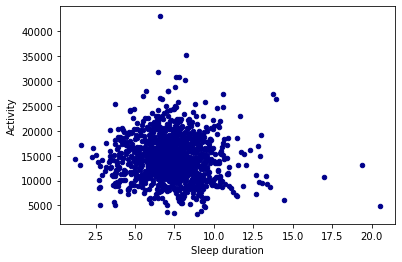

In [58]:
ax1 = winter18_activity.plot.scatter(x='Sleep duration',
                      y='Activity',
                      c='DarkBlue')

In [59]:
print(winter18_activity.shape)
winter18_activity[winter18_activity['Sleep duration']>12.5].sort_values(by='Date').head(10)

(1119, 12)


,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,hour,standarized_bedtime
index,,,,,,,,,,,,
480,winter0046,2018-01-23,winterWeekday,2018-01-23 19:42:00,2018-01-24 15:04:15,19.370833,1182.00,904.25,13121.027458,19.700000,19,0.416670
496,winter0043,2018-01-23,winterWeekday,2018-01-23 19:50:30,2018-01-24 09:09:00,13.308333,1190.50,549.00,10834.223263,19.833333,19,0.550003
792,winter0063,2018-01-23,winterWeekday,2018-01-23 19:41:15,2018-01-24 12:39:45,16.975000,1181.25,759.75,10733.567251,19.683333,19,0.400003
884,winter0059,2018-01-23,winterWeekday,2018-01-23 19:41:15,2018-01-24 08:21:30,12.670833,1181.25,501.50,11087.863248,19.683333,19,0.400003
964,winter0073,2018-01-23,winterWeekday,2018-01-23 19:42:00,2018-01-24 08:21:30,12.658333,1182.00,501.50,7280.395010,19.700000,19,0.416670
1058,winter0049,2018-01-23,winterWeekday,2018-01-23 19:43:30,2018-01-24 09:07:45,13.404167,1183.50,547.75,9365.736585,19.716667,19,0.433337
1105,winter0061,2018-01-23,winterWeekday,2018-01-23 20:17:45,2018-01-24 09:07:45,12.833333,1217.75,547.75,17022.852689,20.283333,20,1.000003
1379,winter0041,2018-01-26,winterWeekday,2018-01-27 01:20:15,2018-01-27 15:04:15,13.733333,1520.25,904.25,27449.517145,1.333333,1,6.050003
181,winter0062,2018-01-27,winterWeekend/Holiday,2018-01-28 00:10:45,2018-01-28 13:06:45,12.933333,1450.75,786.75,14943.448276,0.166667,0,4.883337


These rows are probably bad because they all contain weird hours for sleep duration and all of their sleep onsets are all around the same time.

In [60]:
bad_data_rows = [480,496,792,884,964,1058,1105]
winter18_activity = winter18_activity.drop(bad_data_rows)
print(winter18_activity.shape)

(1112, 12)


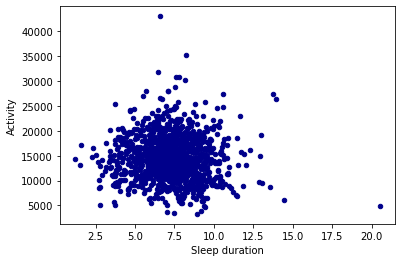

In [61]:
ax1 = winter18_activity.plot.scatter(x='Sleep duration',
                      y='Activity',
                      c='DarkBlue')

In [62]:
winter18_vis_no_outliers = winter18_activity[(winter18_activity['Sleep duration']<15)&(winter18_activity['Activity']<40000)]
print(winter18_vis_no_outliers.shape)
winter18_vis_no_outliers

(1110, 12)


,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,hour,standarized_bedtime
index,,,,,,,,,,,,
2,winter0112,2018-02-08,winterWeekday,2018-02-09 03:55:45,2018-02-09 09:59:45,6.066667,1675.75,599.75,15853.161472,3.916667,3,8.633337
8,winter0112,2018-02-09,winterWeekday,2018-02-10 03:46:30,2018-02-10 12:44:30,8.966667,1666.50,764.50,18256.432910,3.766667,3,8.483337
7,winter0112,2018-02-10,winterWeekend/Holiday,2018-02-11 03:50:00,2018-02-11 13:21:30,9.525000,1670.00,801.50,20681.729598,3.833333,3,8.550003
10,winter0112,2018-02-11,winterWeekend/Holiday,2018-02-12 03:02:30,2018-02-12 07:29:30,4.450000,1622.50,449.50,17155.551679,3.033333,3,7.750003
11,winter0112,2018-02-12,winterWeekday,2018-02-13 02:36:00,2018-02-13 11:03:15,8.454167,1596.00,663.25,22383.457403,2.600000,2,7.316670
...,...,...,...,...,...,...,...,...,...,...,...,...
1381,winter0041,2018-02-01,winterWeekday,2018-02-02 03:40:15,2018-02-02 07:04:45,3.408333,1660.25,424.75,15939.415730,3.666667,3,8.383337
1388,winter0041,2018-02-02,winterWeekday,2018-02-02 23:46:00,2018-02-03 13:40:45,13.912500,1426.00,820.75,26432.053156,23.766667,23,4.483337
1376,winter0041,2018-02-03,winterWeekend/Holiday,2018-02-04 02:13:15,2018-02-04 07:22:45,5.158333,1573.25,442.75,18600.332103,2.216667,2,6.933337


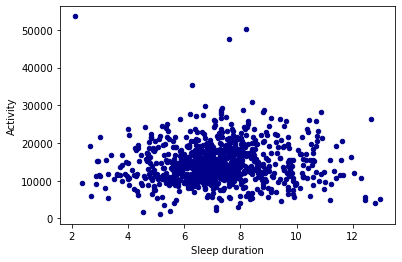

In [63]:
ax2 = summer16_activity.plot.scatter(x='Sleep duration',
                      y='Activity',
                      c='DarkBlue')

In [64]:
summer16_vis_no_outliers = summer16_activity[(summer16_activity['Activity']<40000)]

In [65]:
summer16_activity[summer16_activity['Sleep duration']>12].sort_values(by='Date')

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,hour,standarized_bedtime
index,,,,,,,,,,,,
649,summer_160020,2016-07-07,summer_16Weekday,2016-07-08 05:34:00,2016-07-08 18:00:45,12.445833,1774.00,1080.75,4815.446266,5.566667,5,8.950007
524,summer_160015,2016-07-09,summer_16Weekend/Holiday,2016-07-09 22:44:15,2016-07-10 10:48:00,12.062500,1364.25,648.00,12072.361809,22.733333,22,2.116673
364,summer_160070,2016-07-14,summer_16Weekday,2016-07-14 23:54:30,2016-07-15 12:52:00,12.958333,1434.50,772.00,5067.103605,23.900000,23,3.283340
513,summer_160049,2016-07-16,summer_16Weekend/Holiday,2016-07-16 21:46:45,2016-07-17 10:12:00,12.420833,1306.75,612.00,5803.663891,21.766667,21,1.150007
927,summer_160082,2016-07-17,summer_16Weekend/Holiday,2016-07-18 00:35:15,2016-07-18 13:15:00,12.662500,1475.25,795.00,26316.723997,0.583333,0,3.966673
1063,summer_160051,2016-07-22,summer_16Weekday,2016-07-23 01:45:00,2016-07-23 14:33:00,12.800000,1545.00,873.00,3968.622754,1.750000,1,5.133340
314,summer_160064,2016-07-23,summer_16Weekend/Holiday,2016-07-24 00:19:45,2016-07-24 12:38:00,12.304167,1459.75,758.00,10638.435502,0.316667,0,3.700007


In [124]:
summer16_activity

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,hour,standarized_bedtime
index,,,,,,,,,,,,
14,summer_160048,2016-07-13,summer_16Weekday,2016-07-14 02:46:30,2016-07-14 08:49:15,6.045833,1606.50,529.25,15868.927303,2.766667,2,6.150007
9,summer_160048,2016-07-14,summer_16Weekday,2016-07-15 02:25:00,2016-07-15 12:27:30,10.041667,1585.00,747.50,18214.776589,2.416667,2,5.800007
5,summer_160048,2016-07-15,summer_16Weekday,2016-07-16 01:42:00,2016-07-16 09:03:00,7.350000,1542.00,543.00,29356.921776,1.700000,1,5.083340
15,summer_160048,2016-07-16,summer_16Weekend/Holiday,2016-07-17 04:45:30,2016-07-17 13:34:30,8.816667,1725.50,814.50,28099.839554,4.750000,4,8.133340
11,summer_160048,2016-07-17,summer_16Weekend/Holiday,2016-07-18 01:31:15,2016-07-18 12:23:00,10.862500,1531.25,743.00,28247.682620,1.516667,1,4.900007
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,summer_160024,2016-07-06,summer_16Weekday,2016-07-07 00:25:30,2016-07-07 06:01:45,5.604167,1465.50,361.75,18853.538334,0.416667,0,3.800007
1082,summer_160024,2016-07-07,summer_16Weekday,2016-07-08 02:05:00,2016-07-08 10:14:00,8.150000,1565.00,614.00,23623.304843,2.083333,2,5.466673
1093,summer_160024,2016-07-08,summer_16Weekday,2016-07-09 03:47:00,2016-07-09 07:48:45,4.029167,1667.00,468.75,10724.905998,3.783333,3,7.166673


In [66]:
print(earliest_bed_winter)
earliest_bed_summer

7:17pm


'8:37pm'

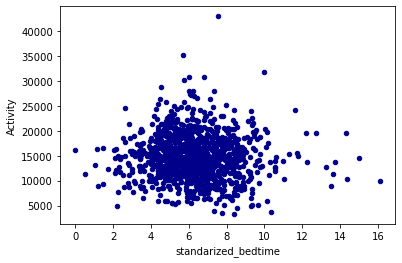

In [67]:
ax3 = winter18_activity.plot.scatter(x='standarized_bedtime',
                      y='Activity',
                      c='DarkBlue')

In [68]:
winter18_vis_no_outliers = winter18_vis_no_outliers[winter18_vis_no_outliers['standarized_bedtime']<13]

In [69]:
winter18_activity[winter18_activity['standarized_bedtime']>10].sort_values(by='Date')

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,hour,standarized_bedtime
index,,,,,,,,,,,,
1229,winter0003,2018-01-08,winterWeekday,2018-01-09 09:00:30,2018-01-09 12:52:45,3.870833,1980.50,772.75,13756.877235,9.000000,9,13.716670
27,winter0002,2018-01-12,winterWeekday,2018-01-13 05:23:30,2018-01-13 09:17:15,3.895833,1763.50,557.25,16732.969838,5.383333,5,10.100003
1226,winter0003,2018-01-12,winterWeekday,2018-01-13 05:19:30,2018-01-13 13:41:45,8.370833,1759.50,821.75,20465.739889,5.316667,5,10.033337
824,winter0038,2018-01-12,winterWeekday,2018-01-13 07:29:15,2018-01-13 15:13:45,7.741667,1889.25,913.75,19638.383595,7.483333,7,12.200003
797,winter0033,2018-01-13,winterWeekend/Holiday,2018-01-14 08:01:00,2018-01-14 12:33:15,4.537500,1921.00,753.25,19526.837813,8.016667,8,12.733337
1214,winter0003,2018-01-13,winterWeekend/Holiday,2018-01-14 06:54:00,2018-01-14 14:08:15,7.237500,1854.00,848.25,24144.241461,6.900000,6,11.616670
1216,winter0003,2018-01-14,winterWeekend/Holiday,2018-01-15 05:52:30,2018-01-15 12:14:45,6.370833,1792.50,734.75,12652.453045,5.866667,5,10.583337
939,winter0029,2018-01-14,winterWeekend/Holiday,2018-01-15 05:28:15,2018-01-15 08:36:15,3.133333,1768.25,516.25,17473.196850,5.466667,5,10.183337
598,winter0027,2018-01-14,winterWeekend/Holiday,2018-01-15 05:27:30,2018-01-15 10:05:15,4.629167,1767.50,605.25,19804.847229,5.450000,5,10.166670


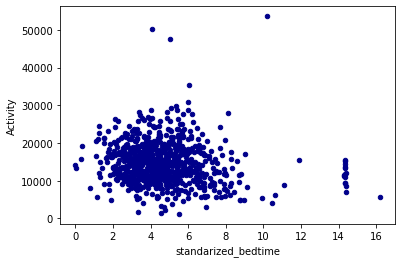

In [70]:
ax4 = summer16_activity.plot.scatter(x='standarized_bedtime',
                      y='Activity',
                      c='DarkBlue')

In [71]:
summer16_vis_no_outliers = summer16_vis_no_outliers[summer16_vis_no_outliers['standarized_bedtime']<10]

In [72]:
summer16_activity[summer16_activity['Date']>'2016-07-10'].sort_values(by='Date').get('Date').unique()

array(['2016-07-13T00:00:00.000000000', '2016-07-14T00:00:00.000000000',
       '2016-07-15T00:00:00.000000000', '2016-07-16T00:00:00.000000000',
       '2016-07-17T00:00:00.000000000', '2016-07-18T00:00:00.000000000',
       '2016-07-19T00:00:00.000000000', '2016-07-20T00:00:00.000000000',
       '2016-07-21T00:00:00.000000000', '2016-07-22T00:00:00.000000000',
       '2016-07-23T00:00:00.000000000', '2016-07-24T00:00:00.000000000',
       '2016-07-25T00:00:00.000000000', '2016-07-26T00:00:00.000000000'],
      dtype='datetime64[ns]')

These rows are bad data because they all have very unusual bedtimes but these unusual times line up for multiple different people on the same day.

In [73]:
bad_summer_rows = [207, 224, 256, 272, 352, 384, 450, 481, 575, 690, 785, 848, 979, 1042]
summer16_activity = summer16_activity.drop(bad_summer_rows)
summer16_activity[summer16_activity['standarized_bedtime']>14]

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,hour,standarized_bedtime
index,,,,,,,,,,,,
652,summer_160020,2016-07-10,summer_16Weekend/Holiday,2016-07-11 12:48:45,2016-07-11 18:00:45,5.2,2208.75,1080.75,5567.433414,12.8,12,16.18334


### Keep middle X% of data. X = 95%

As per Tyler's recommendation, let's remove some of the outliers for both activity and sleep duration. Treat above 35000 for activity as an outlier and above 15hrs for sleep duration as outliers as well.
- Note: I should write a function that takes a certain percent of the dataset from each end and throws it out so it would be easy to take middle 90 or 95% of the dataset.

In [74]:
def keepMiddlePercentageOfData(activity_df, column, percent):
    length = activity_df.shape[0]
    new_length = length*(percent/100)
    remove_one_side = (length-new_length)//2
    return activity_df.sort_values(by=column).iloc[int(remove_one_side):int(length-remove_one_side)]

In [75]:
winter18_activity.shape

(1112, 12)

- sb is standarized_bedtime
- sd is sleep duration

In [76]:
winter18_temp = keepMiddlePercentageOfData(winter18_activity, 'Activity', 95)
winter18_middle_95_sd = keepMiddlePercentageOfData(winter18_temp, 'Sleep duration', 95)
winter18_middle_95_sb = keepMiddlePercentageOfData(winter18_temp, 'standarized_bedtime', 95)
print(winter18_middle_95_sd.shape)
print(winter18_middle_95_sb.shape)

(1006, 12)
(1006, 12)


In [77]:
summer16_activity.shape

(830, 12)

In [78]:
summer16_temp = keepMiddlePercentageOfData(summer16_activity, 'Activity', 95)
summer16_middle_95_sd = keepMiddlePercentageOfData(summer16_temp, 'Sleep duration', 95)
summer16_middle_95_sb = keepMiddlePercentageOfData(summer16_temp, 'standarized_bedtime', 95)
print(summer16_middle_95_sd.shape)
print(summer16_middle_95_sb.shape)

(752, 12)
(752, 12)


question: is it better to define outliers by unusual sleep hours or by even metrics like 95%? like should i use **keepMiddlePercentageOfData** or stick to removing above 15 hrs sleep and above 3500 activity?

Summary:
We have three groups of dataframes.
- **Normal**(Cleaned for bad data)
    - winter18_activity and summer16_activity
- **Middle 95% of Dataset**(Cleaned for bad data + only has middle 95% of dataset)
    - winter18_middle_95 and summer16_middle_95
- **No outliers visually**(Cleaned for bad data + outliers that can be seen visually from graph are removed)
    - winter18_vis_no_outliers and summer16_vis_no_outliers

## Statsmodels OLS

### Normal, Winter18, Sleep duration vs Activity

In [79]:
predictors = ['Sleep duration']
X = winter18_activity[predictors]
Y = winter18_activity['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='Sleep duration', ylabel='Activity'>

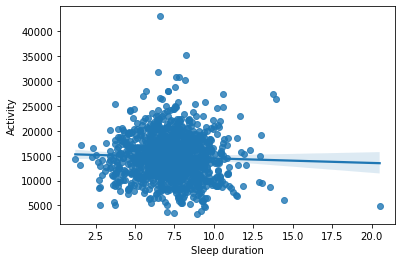

In [80]:
sns.regplot(x='Sleep duration', y='Activity', data=winter18_activity)

In [81]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.624
Date:                Wed, 17 Aug 2022   Prob (F-statistic):              0.203
Time:                        10:08:25   Log-Likelihood:                -10940.
No. Observations:                1112   AIC:                         2.188e+04
Df Residuals:                    1110   BIC:                         2.189e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.538e+04    539.458     28.502      0.000    1.43e+04    1.64e+04
Sleep duration   -91.8482     72.081     -1.274      0.203    -233.279      49.583
==============================================================================
Omnibus:                      114.239   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.172
Skew:                           0.643   Prob(JB):                     7.72e-50
Kurtosis:                       4.796   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Normal, Summer16, Sleep duration vs Activity

In [82]:
predictors = ['Sleep duration']
X = summer16_activity[predictors]
Y = summer16_activity['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='Sleep duration', ylabel='Activity'>

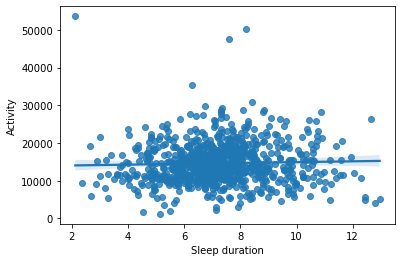

In [83]:
sns.regplot(x='Sleep duration', y='Activity', data=summer16_activity)

In [84]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.014
Date:                Wed, 17 Aug 2022   Prob (F-statistic):              0.314
Time:                        10:08:25   Log-Likelihood:                -8330.5
No. Observations:                 830   AIC:                         1.666e+04
Df Residuals:                     828   BIC:                         1.667e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.382e+04    815.061     16.954      0.000    1.22e+04    1.54e+04
Sleep duration   110.2502    109.499      1.007      0.314    -104.679     325.179
==============================================================================
Omnibus:                      264.569   Durbin-Watson:                   1.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1533.184
Skew:                           1.321   Prob(JB):                         0.00
Kurtosis:                       9.112   Cond. No.                         32.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Normal, Winter18, Standarized Bedtime vs Activity

In [85]:
predictors = ['standarized_bedtime']
X = winter18_activity[predictors]
Y = winter18_activity['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='standarized_bedtime', ylabel='Activity'>

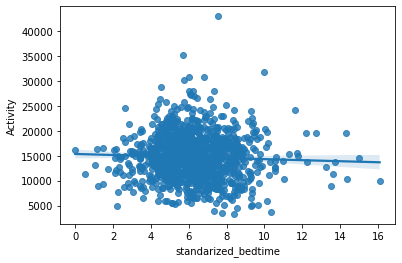

In [86]:
sns.regplot(x='standarized_bedtime', y='Activity', data=winter18_activity)

In [87]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.008
Date:                Wed, 17 Aug 2022   Prob (F-statistic):              0.157
Time:                        10:08:25   Log-Likelihood:                -10940.
No. Observations:                1112   AIC:                         2.188e+04
Df Residuals:                    1110   BIC:                         2.189e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.536e+04    479.566     32.034      0.000    1.44e+04    1.63e+04
standarized_bedtime  -103.8956     73.326     -1.417      0.157    -247.770      39.978
==============================================================================
Omnibus:                      114.412   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.304
Skew:                           0.641   Prob(JB):                     2.66e-50
Kurtosis:                       4.812   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Normal, Summer16, Standarized Bedtime vs Activity

In [88]:
predictors = ['standarized_bedtime']
X = summer16_activity[predictors]
Y = summer16_activity['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='standarized_bedtime', ylabel='Activity'>

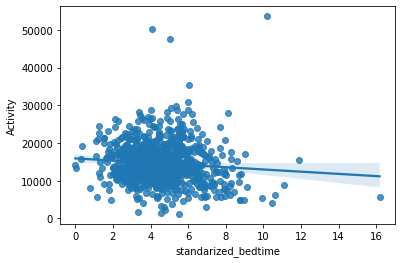

In [89]:
sns.regplot(x='standarized_bedtime', y='Activity', data=summer16_activity)

In [90]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.839
Date:                Wed, 17 Aug 2022   Prob (F-statistic):            0.00908
Time:                        10:08:26   Log-Likelihood:                -8327.6
No. Observations:                 830   AIC:                         1.666e+04
Df Residuals:                     828   BIC:                         1.667e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.594e+04    541.012     29.462      0.000    1.49e+04     1.7e+04
standarized_bedtime  -293.4839    112.221     -2.615      0.009    -513.754     -73.214
==============================================================================
Omnibus:                      288.151   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1810.910
Skew:                           1.429   Prob(JB):                         0.00
Kurtosis:                       9.648   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Middle 95%, Winter18, Sleep duration vs Activity

In [91]:
predictors = ['Sleep duration']
X = winter18_middle_95_sd[predictors]
Y = winter18_middle_95_sd['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='Sleep duration', ylabel='Activity'>

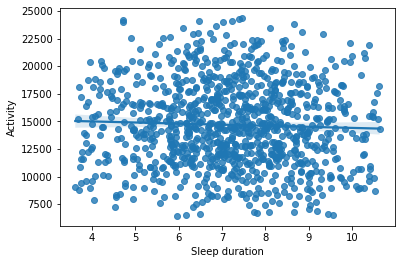

In [92]:
sns.regplot(x='Sleep duration', y='Activity', data=winter18_middle_95_sd)

In [93]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.622
Date:                Wed, 17 Aug 2022   Prob (F-statistic):              0.203
Time:                        10:08:26   Log-Likelihood:                -9724.1
No. Observations:                1006   AIC:                         1.945e+04
Df Residuals:                    1004   BIC:                         1.946e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.54e+04    566.172     27.192      0.000    1.43e+04    1.65e+04
Sleep duration   -97.9051     76.882     -1.273      0.203    -248.773      52.962
==============================================================================
Omnibus:                       32.267   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.022
Skew:                           0.179   Prob(JB):                     7.40e-05
Kurtosis:                       2.429   Cond. No.                         35.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Middle 95%, Summer16, Sleep duration vs Activity

In [94]:
predictors = ['Sleep duration']
X = summer16_middle_95_sd[predictors]
Y = summer16_middle_95_sd['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='Sleep duration', ylabel='Activity'>

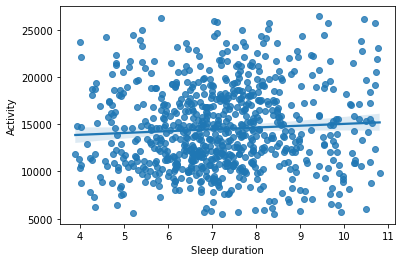

In [95]:
sns.regplot(x='Sleep duration', y='Activity', data=summer16_middle_95_sd)

In [96]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.158
Date:                Wed, 17 Aug 2022   Prob (F-statistic):             0.0759
Time:                        10:08:26   Log-Likelihood:                -7384.7
No. Observations:                 752   AIC:                         1.477e+04
Df Residuals:                     750   BIC:                         1.478e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.312e+04    799.770     16.402      0.000    1.15e+04    1.47e+04
Sleep duration   193.0208    108.609      1.777      0.076     -20.193     406.235
==============================================================================
Omnibus:                       23.863   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.338
Skew:                           0.352   Prob(JB):                     2.33e-05
Kurtosis:                       2.571   Cond. No.                         36.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Middle 95%, Winter18, Standarized Bedtime vs Activity

In [97]:
predictors = ['standarized_bedtime']
X = winter18_middle_95_sb[predictors]
Y = winter18_middle_95_sb['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='standarized_bedtime', ylabel='Activity'>

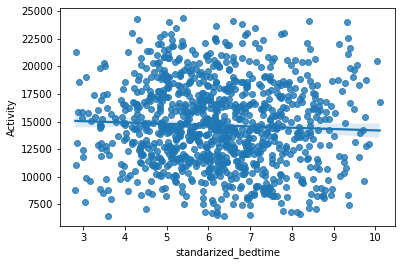

In [98]:
sns.regplot(x='standarized_bedtime', y='Activity', data=winter18_middle_95_sb)

In [99]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.130
Date:                Wed, 17 Aug 2022   Prob (F-statistic):              0.145
Time:                        10:08:26   Log-Likelihood:                -9729.3
No. Observations:                1006   AIC:                         1.946e+04
Df Residuals:                    1004   BIC:                         1.947e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.539e+04    520.785     29.555      0.000    1.44e+04    1.64e+04
standarized_bedtime  -118.9246     81.478     -1.460      0.145    -278.812      40.963
==============================================================================
Omnibus:                       34.373   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.708
Skew:                           0.178   Prob(JB):                     5.25e-05
Kurtosis:                       2.414   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Middle 95%, Summer16, Standarized Bedtime vs Activity

In [100]:
predictors = ['standarized_bedtime']
X = summer16_middle_95_sb[predictors]
Y = summer16_middle_95_sb['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='standarized_bedtime', ylabel='Activity'>

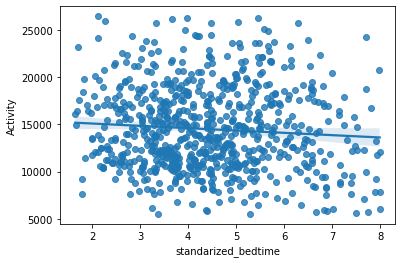

In [101]:
sns.regplot(x='standarized_bedtime', y='Activity', data=summer16_middle_95_sb)

In [102]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.577
Date:                Wed, 17 Aug 2022   Prob (F-statistic):             0.0327
Time:                        10:08:27   Log-Likelihood:                -7377.2
No. Observations:                 752   AIC:                         1.476e+04
Df Residuals:                     750   BIC:                         1.477e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.559e+04    534.704     29.153      0.000    1.45e+04    1.66e+04
standarized_bedtime  -246.7903    115.360     -2.139      0.033    -473.257     -20.324
==============================================================================
Omnibus:                       30.041   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.559
Skew:                           0.445   Prob(JB):                     3.81e-07
Kurtosis:                       2.610   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Middle 95%, Winter18, Standarized Bedtime vs Activity

In [103]:
predictors = ['standarized_bedtime']
X = winter18_middle_95_sb[predictors]
Y = winter18_middle_95_sb['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='standarized_bedtime', ylabel='Activity'>

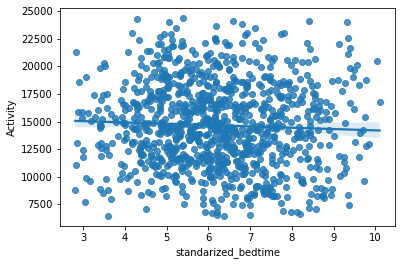

In [104]:
sns.regplot(x='standarized_bedtime', y='Activity', data=winter18_middle_95_sb)

In [105]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.130
Date:                Wed, 17 Aug 2022   Prob (F-statistic):              0.145
Time:                        10:08:27   Log-Likelihood:                -9729.3
No. Observations:                1006   AIC:                         1.946e+04
Df Residuals:                    1004   BIC:                         1.947e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.539e+04    520.785     29.555      0.000    1.44e+04    1.64e+04
standarized_bedtime  -118.9246     81.478     -1.460      0.145    -278.812      40.963
==============================================================================
Omnibus:                       34.373   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.708
Skew:                           0.178   Prob(JB):                     5.25e-05
Kurtosis:                       2.414   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Visually No Outliers, Winter18, Sleep duration vs Activity

In [106]:
predictors = ['Sleep duration']
X = winter18_vis_no_outliers[predictors]
Y = winter18_vis_no_outliers['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='Sleep duration', ylabel='Activity'>

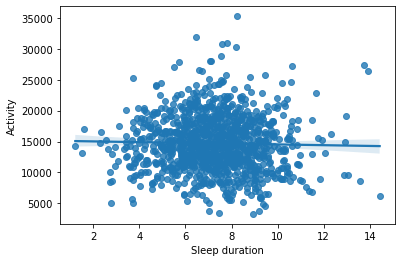

In [107]:
sns.regplot(x='Sleep duration', y='Activity', data=winter18_vis_no_outliers)

In [108]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7030
Date:                Wed, 17 Aug 2022   Prob (F-statistic):              0.402
Time:                        10:08:27   Log-Likelihood:                -10823.
No. Observations:                1102   AIC:                         2.165e+04
Df Residuals:                    1100   BIC:                         2.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.515e+04    545.749     27.764      0.000    1.41e+04    1.62e+04
Sleep duration   -61.2301     73.025     -0.838      0.402    -204.514      82.054
==============================================================================
Omnibus:                       49.725   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.521
Skew:                           0.459   Prob(JB):                     4.37e-14
Kurtosis:                       3.704   Cond. No.                         30.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Visually No Outliers, Summer16, Sleep duration vs Activity

In [109]:
predictors = ['Sleep duration']
X = summer16_vis_no_outliers[predictors]
Y = summer16_vis_no_outliers['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='Sleep duration', ylabel='Activity'>

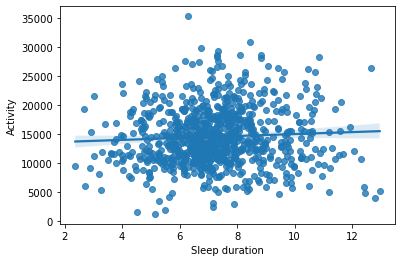

In [110]:
sns.regplot(x='Sleep duration', y='Activity', data=summer16_vis_no_outliers)

In [111]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.745
Date:                Wed, 17 Aug 2022   Prob (F-statistic):             0.0979
Time:                        10:08:28   Log-Likelihood:                -8179.2
No. Observations:                 822   AIC:                         1.636e+04
Df Residuals:                     820   BIC:                         1.637e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.33e+04    757.926     17.553      0.000    1.18e+04    1.48e+04
Sleep duration   168.5391    101.718      1.657      0.098     -31.119     368.197
==============================================================================
Omnibus:                       30.778   Durbin-Watson:                   1.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.439
Skew:                           0.465   Prob(JB):                     5.48e-08
Kurtosis:                       3.336   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Visually No Outliers, Winter18, Standarized Bedtime vs Activity

In [112]:
predictors = ['standarized_bedtime']
X = winter18_vis_no_outliers[predictors]
Y = winter18_vis_no_outliers['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='standarized_bedtime', ylabel='Activity'>

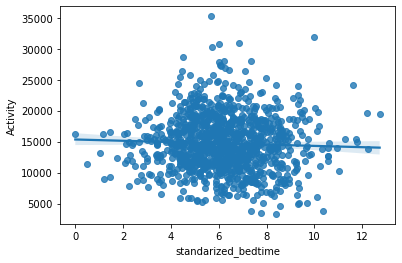

In [113]:
sns.regplot(x='standarized_bedtime', y='Activity', data=winter18_vis_no_outliers)

In [114]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.782
Date:                Wed, 17 Aug 2022   Prob (F-statistic):              0.182
Time:                        10:08:28   Log-Likelihood:                -10822.
No. Observations:                1102   AIC:                         2.165e+04
Df Residuals:                    1100   BIC:                         2.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.535e+04    501.040     30.643      0.000    1.44e+04    1.63e+04
standarized_bedtime  -103.6783     77.657     -1.335      0.182    -256.051      48.694
==============================================================================
Omnibus:                       49.725   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.957
Skew:                           0.463   Prob(JB):                     5.80e-14
Kurtosis:                       3.684   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Visually No Outliers, Summer16, Standarized Bedtime vs Activity

In [115]:
predictors = ['standarized_bedtime']
X = summer16_vis_no_outliers[predictors]
Y = summer16_vis_no_outliers['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='standarized_bedtime', ylabel='Activity'>

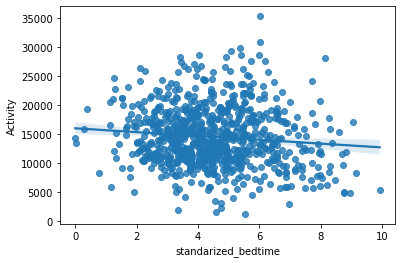

In [116]:
sns.regplot(x='standarized_bedtime', y='Activity', data=summer16_vis_no_outliers)

In [117]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     8.878
Date:                Wed, 17 Aug 2022   Prob (F-statistic):            0.00297
Time:                        10:08:28   Log-Likelihood:                -8176.1
No. Observations:                 822   AIC:                         1.636e+04
Df Residuals:                     820   BIC:                         1.637e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  1.6e+04    525.462     30.449      0.000     1.5e+04     1.7e+04
standarized_bedtime  -330.9513    111.075     -2.980      0.003    -548.976    -112.927
==============================================================================
Omnibus:                       41.848   Durbin-Watson:                   1.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.447
Skew:                           0.546   Prob(JB):                     4.98e-11
Kurtosis:                       3.439   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Winter, Outliers, sleep duration** keeping this example using Sklearn even though I'm using statsmodels now

intercept 15375.835073181912
slope [-91.84821227]
mean squared error 20564770.311447773


Text(0.5, 1.0, 'Winter 2018, Sleep duration and Activity (Outliers)')

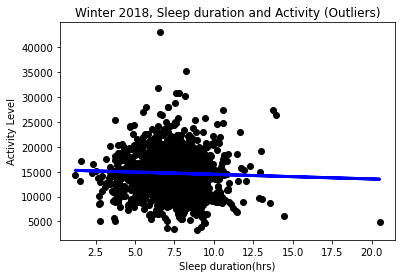

In [118]:
predictors = ['Sleep duration']
X = winter18_activity[predictors]
y = winter18_activity['Activity']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)
model_pred = model.predict(X)
print("intercept " + str(model.intercept_))
print("slope " + str(model.coef_))
print("mean squared error " + str(mean_squared_error(y, model_pred)))
plt.scatter(X, y, color="black")
plt.plot(X, model_pred, color="blue", linewidth=3)
plt.xlabel("Sleep duration(hrs)")
plt.ylabel("Activity Level")
plt.title("Winter 2018, Sleep duration and Activity (Outliers)")

Esther's hypothesis is that people get groggy when they sleep less than 7 hours and when they sleep more than 9 hours. So it is possible that this relationship is quadratic. Let's test that.

Text(0.5, 1.0, 'Summer 2016, Sleep duration and Activity (No Outliers)')

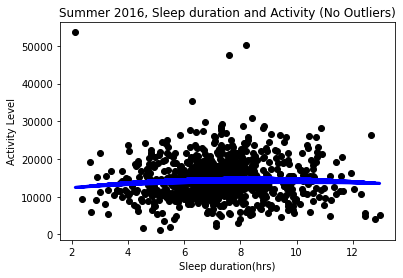

In [119]:
X = summer16_activity['Sleep duration']
X = np.array(X)
y = summer16_activity['Activity']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
predictions = poly_reg_model.predict(poly_features)
plt.scatter(X, y, color="black")
plt.plot(X, predictions, color="blue", linewidth=3)
plt.xlabel("Sleep duration(hrs)")
plt.ylabel("Activity Level")
plt.title("Summer 2016, Sleep duration and Activity (No Outliers)")

Does not seem to help too much.

In [120]:
print(summer_raw.shape)
print(summer_raw[summer_raw['White Light']>0].shape)
print(summer_raw[summer_raw['White Light']>20].shape)
summer_raw[(summer_raw['White Light']>10)&(summer_raw['Activity']>0)].shape

(5984560, 11)
(2700315, 11)
(1321599, 11)


(1295157, 11)

In [121]:
1949192/2700315

0.7218387484423113

In [122]:
summer_raw

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group
DateTime,,,,,,,,,,,
2016-07-12 16:11:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:15,0,0.0,0.0,0.0,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:30,0,0.0,0.0,0.0,1.59,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:45,0,0.0,0.0,0.0,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:12:00,0,0.0,0.0,0.0,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-12 17:18:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,summer_160024,summer_16
2016-07-12 17:18:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,summer_160024,summer_16
2016-07-12 17:18:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,summer_160024,summer_16


In [123]:
summer_raw[summer_raw['White Light']>=0].head(20).sort_values(by="White Light", a)

SyntaxError: positional argument follows keyword argument (995382147.py, line 1)

In [ ]:
summer_raw[summer_raw['White Light']>=0].groupby('Group').mean()

In [ ]:
summer_raw[summer_raw['Sleep/Wake']==0].groupby('Group').mean()

standarization, use both variables are predictors?

- consider counting only counting activity when recieving white light and/or when interval status is ACTIVE
- does wakeup time affect the amount of white light someone recieves?
- Does bedtime affect the amount of blue light someone recieves?
- with mpcc app could I try to predict when users will do something or help them recognize when they are in unhealthy range

In [ ]:
# complete = completeActivityDataframe(sala_winter_data,raw)
# #complete.UID.unique()
# complete

In [ ]:
#complete.head(20)